In [1]:
%pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/33/cd/b145f9797126f3f809d177ca378de57c45413c5099c5990de2658760594a/matplotlib-3.10.7-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/98/4b/9bd370b004b5c9d8045c6c33cf65bae018b27aca550a3f657cdc99acdbd8/contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/bb/78/0e1a6d22b427579ea5c8273e1c07def2f325b977faaf60bb7ddc01456cb1/fonttools-4.60.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/114.6 kB ? eta -:--:--
     --- ------------------------------------ 10.2/114.6 kB ? eta -:


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
%pip install seaborn --upgrade


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/294.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
if 'seaborn-v0_8' in plt.style.available:
    plt.style.use('seaborn-v0_8')
else:
    print("seaborn-v0_8 스타일은 사용할 수 없습니다.")


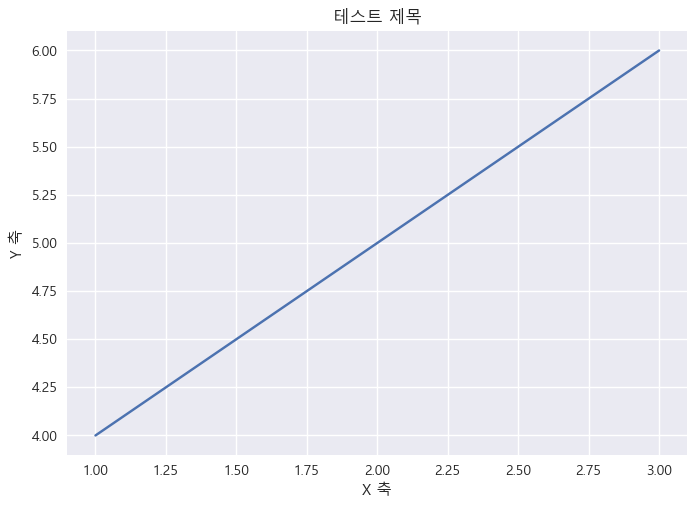

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정 (예: 'Malgun Gothic' 폰트)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows에서 '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# matplotlib에서 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 예시 그래프
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('테스트 제목')  # 한글 제목
plt.xlabel('X 축')       # 한글 X축 레이블
plt.ylabel('Y 축')       # 한글 Y축 레이블
plt.show()


0 STATION
1 NAME
2 DATE
3 TAVG
4 TMAX
5 TMIN


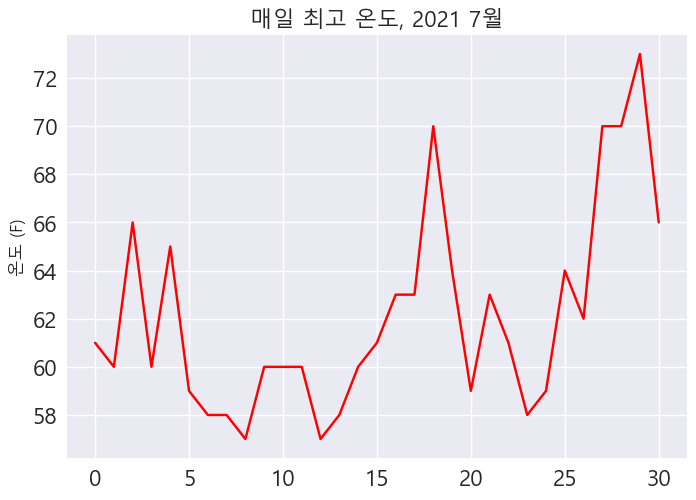

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import csv

import matplotlib.pyplot as plt
# Plot the high temperatures.
plt.style.use('seaborn-v0_8')
#plt.style.use('seaborn') ### seaborn 스타일을 사용하면 matplotlib의 설정이 변경되면서 한글 폰트 설정이 초기화되거나, 시스템의 기본 폰트가 한글을 지원하지 않는 경우에도 발생

# 사용할 한글 폰트를 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows에서 '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# matplotlib에서 폰트 설정
plt.rc('font', family=font_prop.get_name())

path = Path('data/weather_data/sitka_weather_07-2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

for index, column_header in enumerate(header_row):
    print(index, column_header)


# Extract high temperatures.
highs = []
for row in reader: # for loop가 파일의 한줄씩 자동으로 읽는다 > 이해하는 것이 필요
    high = int(row[4]) # 인덱스 4이므로 TMAX를 가져온다
    highs.append(high)


fig, ax = plt.subplots()
ax.plot(highs, color='red') # 그래프 그리기 

# Format plot.
ax.set_title("매일 최고 온도, 2021 7월", fontsize=16)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("온도 (F)", fontsize=12)
ax.tick_params(labelsize=16)

plt.show()

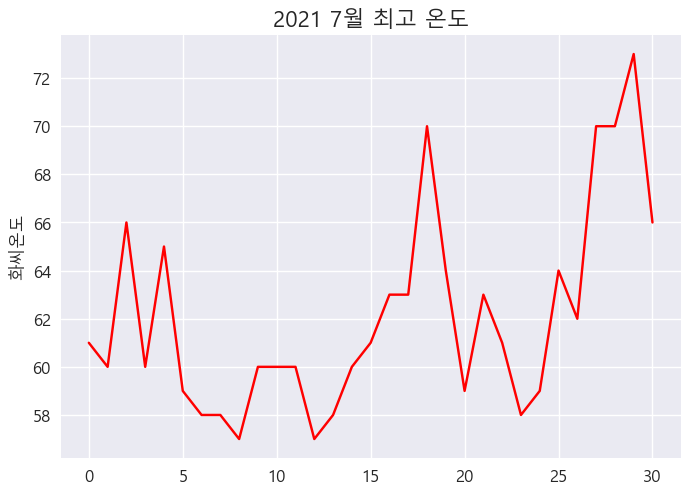

In [9]:
# 파일 읽는 클래스 구현하기

from pathlib import Path
import csv
import matplotlib.pyplot as plt

class WeatherData:
    def __init__(self, file_path):
        self.path = Path(file_path)
        self.highs = []

    def read_data(self):
        """CSV 파일에서 데이터를 읽어 최고 온도를 리스트에 저장합니다."""
        lines = self.path.read_text().splitlines()
        reader = csv.reader(lines)
        header_row = next(reader)  # 헤더 행 건너뛰기

        # 최고 온도 추출
        for row in reader:
            high = int(row[4])  # 5번째 열(인덱스 4)이 최고 온도라고 가정
            self.highs.append(high)

    def plot_high_temperatures(self):
        """저장된 최고 온도의 변화를 그래프로 시각화합니다."""
        fig, ax = plt.subplots()
        ax.plot(self.highs, color='red')

        # 그래프 형식 설정
        ax.set_title("2021 7월 최고 온도", fontsize=16)
        ax.set_xlabel('', fontsize=12)
        ax.set_ylabel("화씨온도", fontsize=12)
        ax.tick_params(labelsize=12)

        plt.show()


# 실행 부분
weather_data = WeatherData( 'data/weather_data/sitka_weather_07-2021_simple.csv')
weather_data.read_data()
weather_data.plot_high_temperatures()


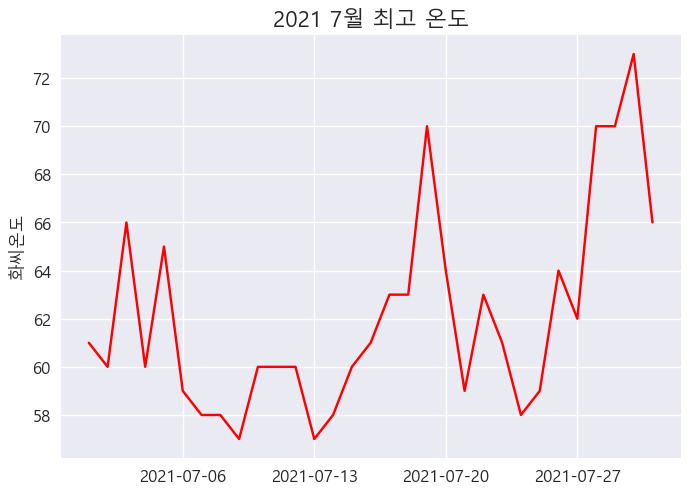

In [10]:
# 파일 읽는 클래스 구현하기 > 
## x축에 날짜로 바꾸기: 그래프에 날짜 추가하기

from pathlib import Path
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

class WeatherData:
    def __init__(self, file_path):
        self.path = Path(file_path)
        self.highs, self.dates = [],[]

    def read_data(self):
        """CSV 파일에서 데이터를 읽어 최고 온도를 리스트에 저장합니다."""
        lines = self.path.read_text().splitlines()
        reader = csv.reader(lines)
        header_row = next(reader)  # 헤더 행 건너뛰기

        # 최고 온도 추출
        for row in reader:
            current_date = datetime.strptime(row[2], '%Y-%m-%d')
            high = int(row[4])  # 5번째 열(인덱스 4)이 최고 온도라고 가정
            self.highs.append(high)
            self.dates.append(current_date)

    def plot_high_temperatures(self):
        """저장된 최고 온도의 변화를 그래프로 시각화합니다."""
        fig, ax = plt.subplots()
        ax.plot(self.dates,self.highs, color='red')

                # 날짜 포맷 및 간격 설정
        ax.xaxis.set_major_locator(mdates.WeekdayLocator())  # 주 단위로 날짜 표시
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # 날짜 형식

        # 그래프 형식 설정
        ax.set_title("2021 7월 최고 온도", fontsize=16)
        ax.set_xlabel('', fontsize=12)
        ax.set_ylabel("화씨온도", fontsize=12)
        ax.tick_params(labelsize=12)

        plt.show()


# 실행 부분
weather_data = WeatherData( 'data/weather_data/sitka_weather_07-2021_simple.csv')
weather_data.read_data()
weather_data.plot_high_temperatures()


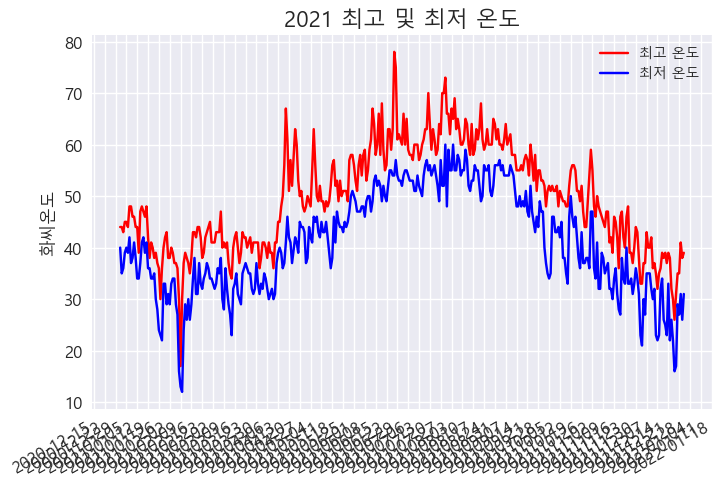

In [12]:
### 실습 구현 대상 - full version 파일에 대하여 구현
from pathlib import Path
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

class WeatherData:
    def __init__(self, file_path):
        self.path = Path(file_path)
        self.highs, self.lows, self.dates = [], [], []

    ### 구현할 부분
    def read_data(self):
        """CSV 파일에서 데이터를 읽어 최고 및 최저 온도를 리스트에 저장합니다."""
        try:
            with self.path.open(encoding='utf-8') as f:
                reader = csv.reader(f)
                header_row = next(reader)  # 헤더 건너뛰기

                # CSV 컬럼 인덱스 찾기 (헤더 순서가 바뀌어도 찾을 수 있도록)
                date_idx = header_row.index('DATE')
                high_idx = header_row.index('TMAX')
                low_idx = header_row.index('TMIN')

                for row in reader:
                    try:
                        date = datetime.strptime(row[date_idx], "%Y-%m-%d")
                        high = int(row[high_idx])
                        low = int(row[low_idx])
                    except ValueError:
                        # 결측치나 잘못된 데이터가 있을 경우 건너뛰기
                        continue

                    self.dates.append(date)
                    self.highs.append(high)
                    self.lows.append(low)

        except FileNotFoundError:
            print(f"❌ 파일을 찾을 수 없습니다: {self.path}")
        except Exception as e:
            print(f"⚠️ 파일 읽기 중 오류 발생: {e}")

    def plot_temperatures(self):
        """저장된 최고 및 최저 온도의 변화를 그래프로 시각화합니다."""
        fig, ax = plt.subplots()
        ax.plot(self.dates, self.highs, color='red', label='최고 온도')
        ax.plot(self.dates, self.lows, color='blue', label='최저 온도')

        # 날짜 포맷 및 간격 설정
        ax.xaxis.set_major_locator(mdates.WeekdayLocator())  # 주 단위로 날짜 표시
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # 날짜 형식

        # 그래프 형식 설정
        ax.set_title("2021 최고 및 최저 온도", fontsize=16)
        ax.set_xlabel('', fontsize=12)
        ax.set_ylabel("화씨온도", fontsize=12)
        ax.tick_params(labelsize=12)
        ax.legend()  # 범례 추가

        fig.autofmt_xdate()  # 날짜가 겹치지 않도록 자동으로 기울여 출력
        plt.show()


# 실행 부분
weather_data = WeatherData('data/weather_data/sitka_weather_2021_full.csv')
weather_data.read_data()
weather_data.plot_temperatures()


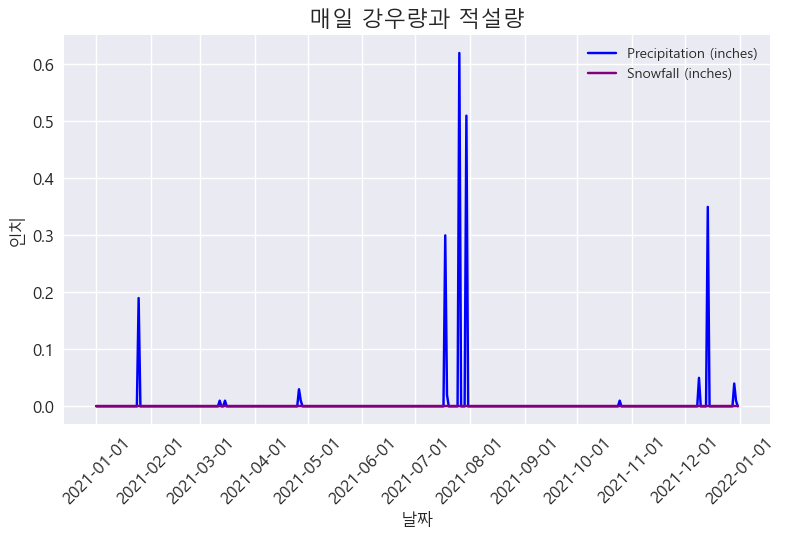

In [15]:
### death valley 파일에 대한 구현
# death_valley_2021-full 데이터 파일 처리 
from pathlib import Path
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

class WeatherData:
    def __init__(self, file_path):
        self.path = Path(file_path)
        self.dates, self.precipitation, self.snowfall = [], [], []

    def read_data(self):
        """CSV 파일에서 데이터를 읽어 최고 및 최저 온도를 리스트에 저장합니다."""

    def read_data(self):
        """CSV에서 날짜, 강수량(PRCP), 적설량(SNOW)을 읽어 리스트에 저장"""
        try:
            with self.path.open(encoding='utf-8') as f:
                reader = csv.reader(f)
                header_row = next(reader)

                date_idx = header_row.index("DATE")
                prcp_idx = header_row.index("PRCP")
                snow_idx = header_row.index("SNOW")

                for row in reader:
                    try:
                        date = datetime.strptime(row[date_idx], "%Y-%m-%d")
                        prcp = float(row[prcp_idx]) if row[prcp_idx] else 0.0
                        snow = float(row[snow_idx]) if row[snow_idx] else 0.0
                    except ValueError:
                        # 잘못된 데이터가 있으면 건너뛰기
                        continue

                    self.dates.append(date)
                    self.precipitation.append(prcp)
                    self.snowfall.append(snow)

        except FileNotFoundError:
            print(f"❌ 파일을 찾을 수 없습니다: {self.path}")
        except Exception as e:
            print(f"⚠️ 파일 읽기 중 오류 발생: {e}")

    
    def plot_precipitation_and_snowfall(self):
        """날짜별 강수량과 적설량 변화를 시각화합니다."""
        fig, ax = plt.subplots()

        # 강수량(PRCP) 그래프
        ax.plot(self.dates, self.precipitation, color='blue', label='Precipitation (inches)')

        # 적설량(SNOW) 그래프 (y축 공유)
        ax.plot(self.dates, self.snowfall, color='purple', label='Snowfall (inches)')

        # 날짜 포맷 및 간격 설정
        ax.xaxis.set_major_locator(mdates.MonthLocator())  # 월 단위로 날짜 표시
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # 날짜 형식

        # 그래프 형식 설정
        ax.set_title("매일 강우량과 적설량", fontsize=16)
        ax.set_xlabel('날짜', fontsize=12)
        ax.set_ylabel('인치', fontsize=12)
        ax.tick_params(labelsize=12)
        plt.xticks(rotation=45)

        # 범례 표시
        ax.legend()

        # 그래프 출력
        plt.tight_layout()
        plt.show()


# 실행 부분
weather_data = WeatherData('data/weather_data/death_valley_2021_full.csv')
weather_data.read_data()
weather_data.plot_precipitation_and_snowfall()
